## Import libraries

In [1]:
import welly, pandas as pd, numpy as np
import matplotlib.pyplot as plt

## Import data

In [2]:
filename = 'facies_vectors.csv'
training_data = pd.read_csv(filename)

training_data['Well Name'] = training_data['Well Name'].astype('category')
training_data['Formation'] = training_data['Formation'].astype('category')

In [3]:
training_data.describe(include='all')

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,4149.000000,4149,4149,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,3232.000000,4149.000000,4149.000000
unique,NaN,14,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,C LM,CROSS H CATTLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,662,501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.503254,NaN,NaN,2906.867438,64.933985,0.659566,4.402484,13.201066,3.725014,1.518438,0.521852
std,2.474324,NaN,NaN,133.300164,30.302530,0.252703,5.274947,7.132846,0.896152,0.499720,0.286644
min,1.000000,NaN,NaN,2573.500000,10.149000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.000000
25%,2.000000,NaN,NaN,2821.500000,44.730000,0.498000,1.600000,8.500000,3.100000,1.000000,0.277000
50%,4.000000,NaN,NaN,2932.500000,64.990000,0.639000,4.300000,12.020000,3.551500,2.000000,0.528000
75%,6.000000,NaN,NaN,3007.000000,79.438000,0.822000,7.500000,16.050000,4.300000,2.000000,0.769000


## Data visualization test

for well in training_data['Well Name'].unique():
    w = training_data.loc[training_data['Well Name'] == well]      
    wl = welly.Well({}) 
    wl.header.uwi = well
    wl.header.name = well
    for i, log in enumerate(list(w)):
        if not log in ['Depth', 'Facies', 'Formation', 'Well Name', 'NM_M', 'RELPOS']:
            p = {'mnemonic': log}
            c = welly.Curve(w[log], basis=w['Depth'].values, params=p)
            wl.data[log]= c    
    wl.plot(extents='curves')  

Great!
However, it would be nice to have the MD tracks, so instead of `extents='curves'` I want to use `tracks=tracks`. 

For some reason it did not work initially. 

Talked to Matt, it looks like the issue is that there's no TD value. 
WIth `wl.plot(tracks=tracks, extents='curves')` it works!

In [4]:
tracks = ['MD', 'GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'MD']

In [5]:
from striplog import Legend
#legend = Legend.builtin('NSDOE')
custom_curve_legend_text = """colour,lw,ls,xlim,xscale,curve mnemonic
red,2.0,-,"-13,213",linear,GR
black,2.0,-,"-0.2,2.2",linear,ILD_log10
lightblue,2.0,-,"-23,23",linear,DeltaPHI
blue,2.0,-,"-3,63",linear,PHIND
darkgreen,2.0,-,"-1,11",linear,PE
"""
custom_curve_legend = Legend.from_csv(text=custom_curve_legend_text)
#complete_legend = legend + custom_curve_legend

for well in training_data['Well Name'].unique():
    w = training_data.loc[training_data['Well Name'] == well]      
    wl = welly.Well({}) 
    wl.header.uwi = well
    wl.header.name = well
    for i, log in enumerate(list(w)):
        if not log in ['Depth', 'Facies', 'Formation', 'Well Name', 'NM_M', 'RELPOS']:
            p = {'mnemonic': log}
            c = welly.Curve(w[log], basis=w['Depth'].values, params=p)
            wl.data[log]= c    
    wl.plot(tracks=tracks, extents='curves', legend = complete_legend) 

##### Most panda-ish version

##### Also: heigth of the plot for each well reflects well length, but have to sort out how to move the title.

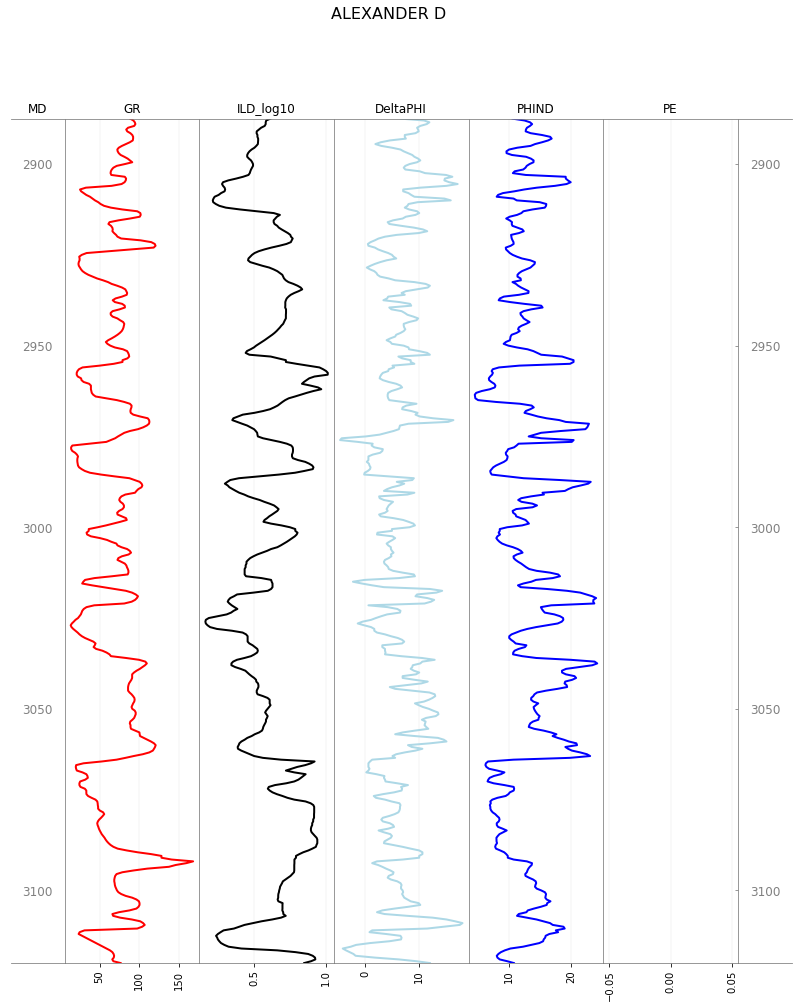

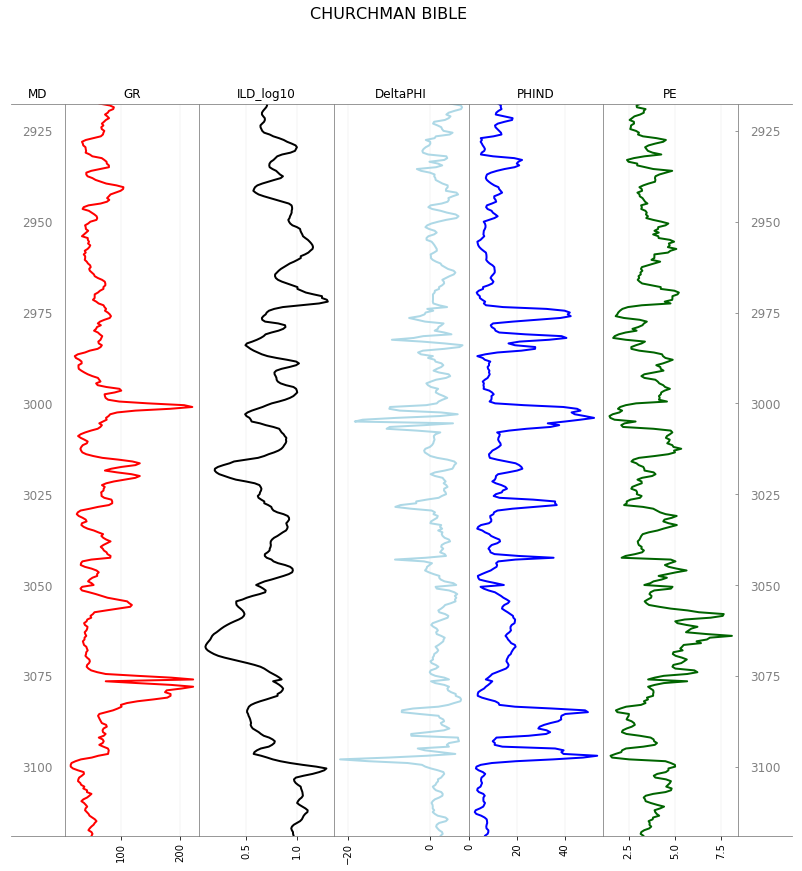

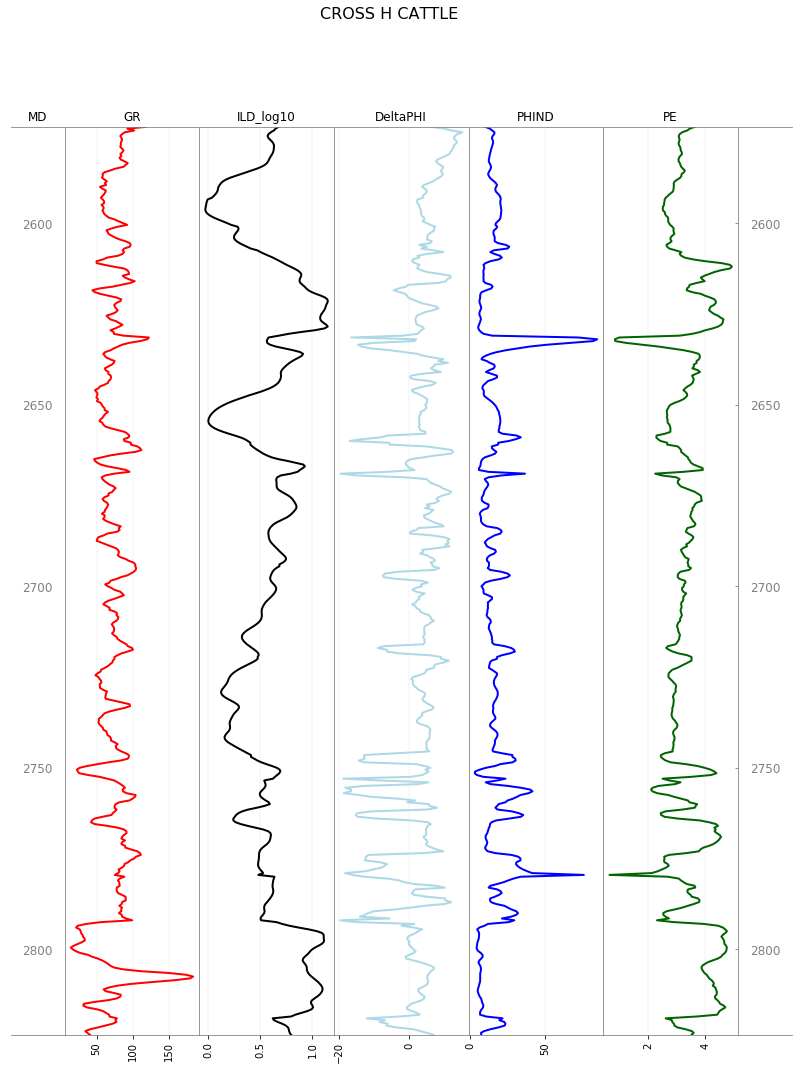

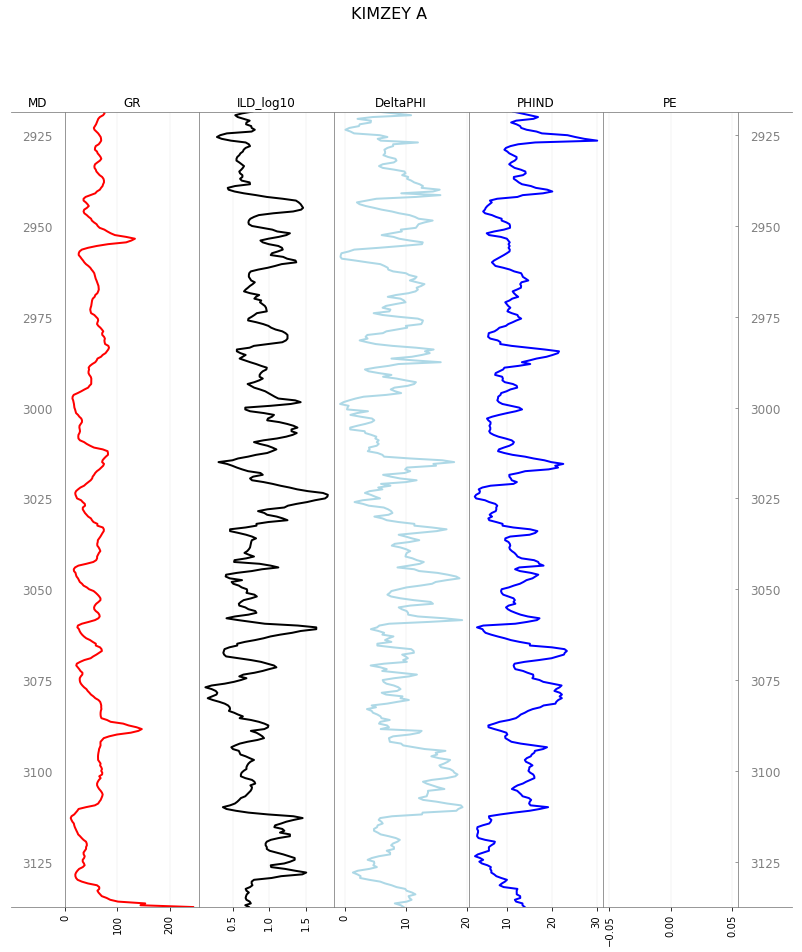

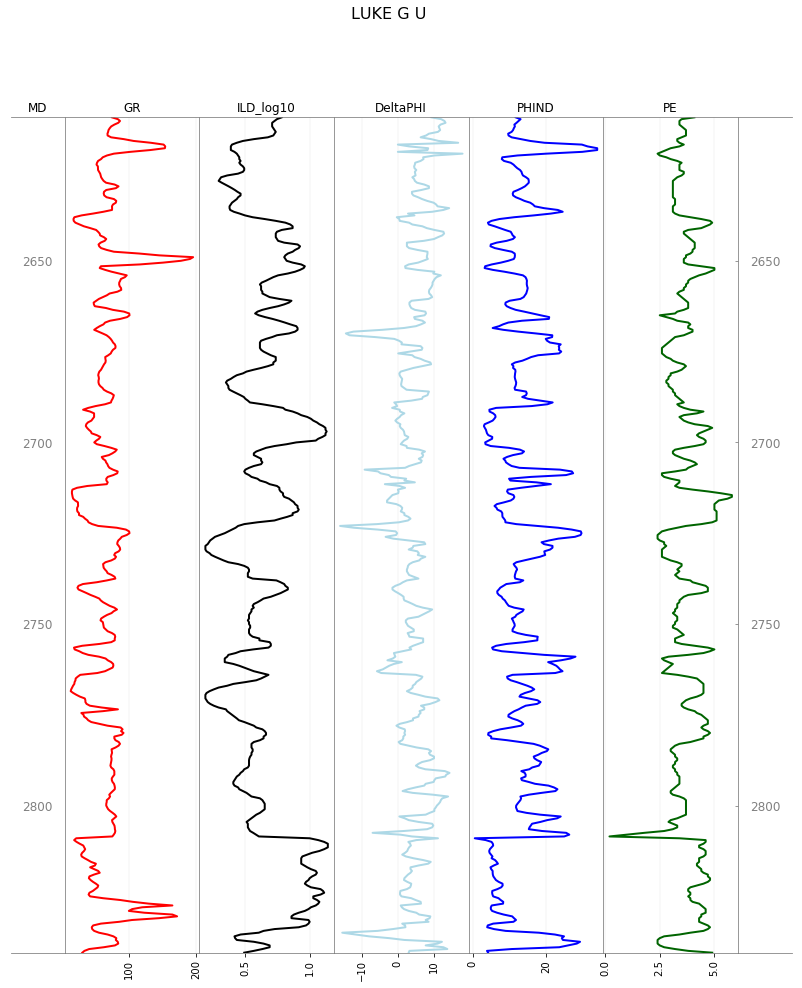

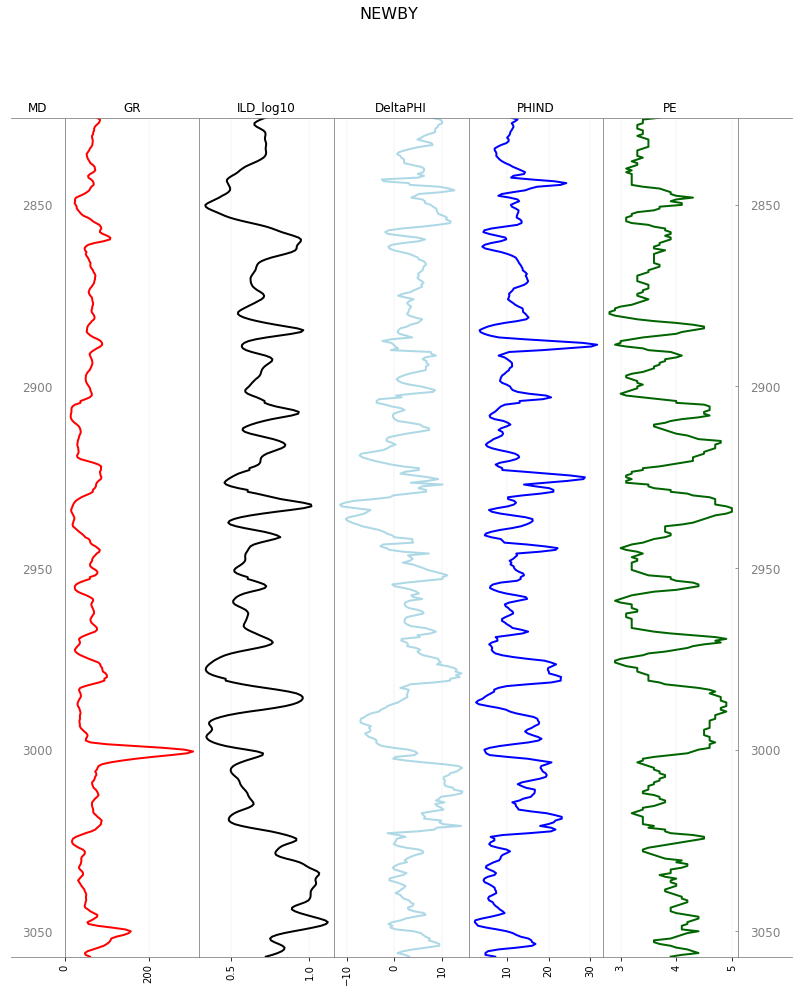

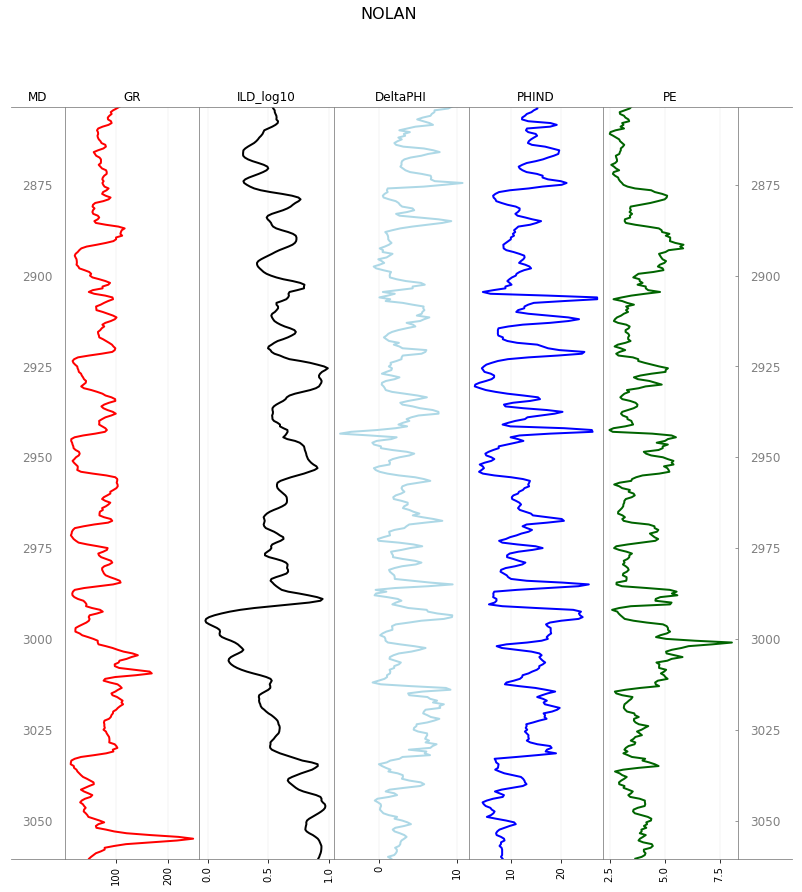

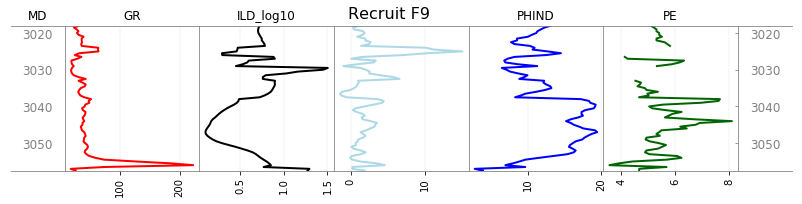

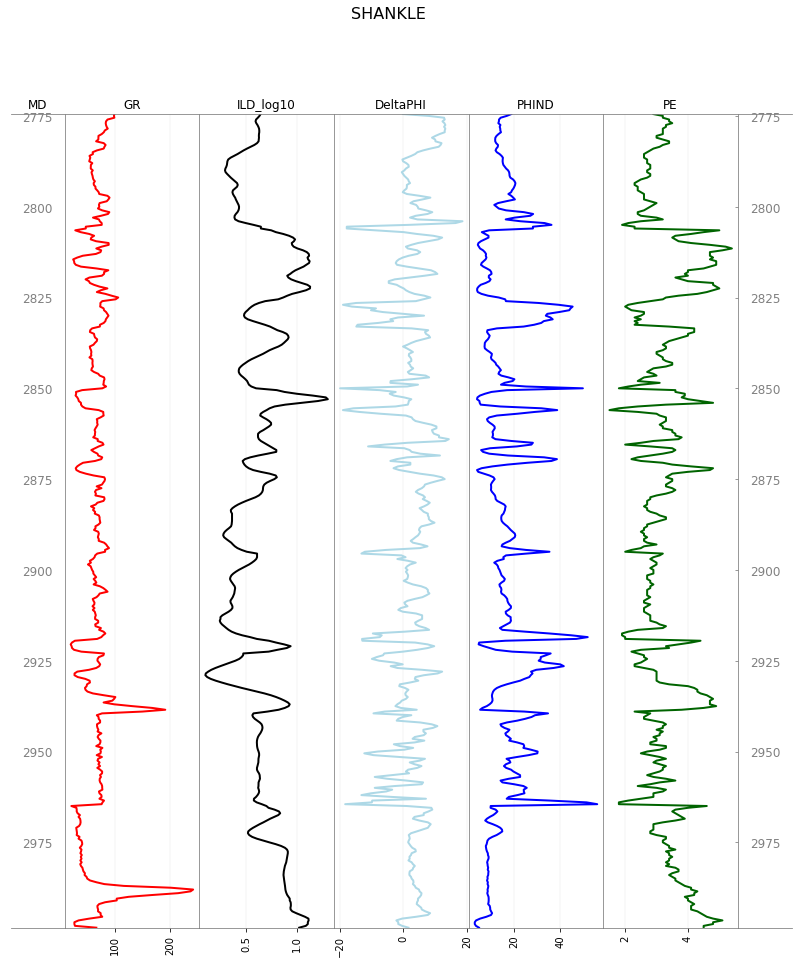

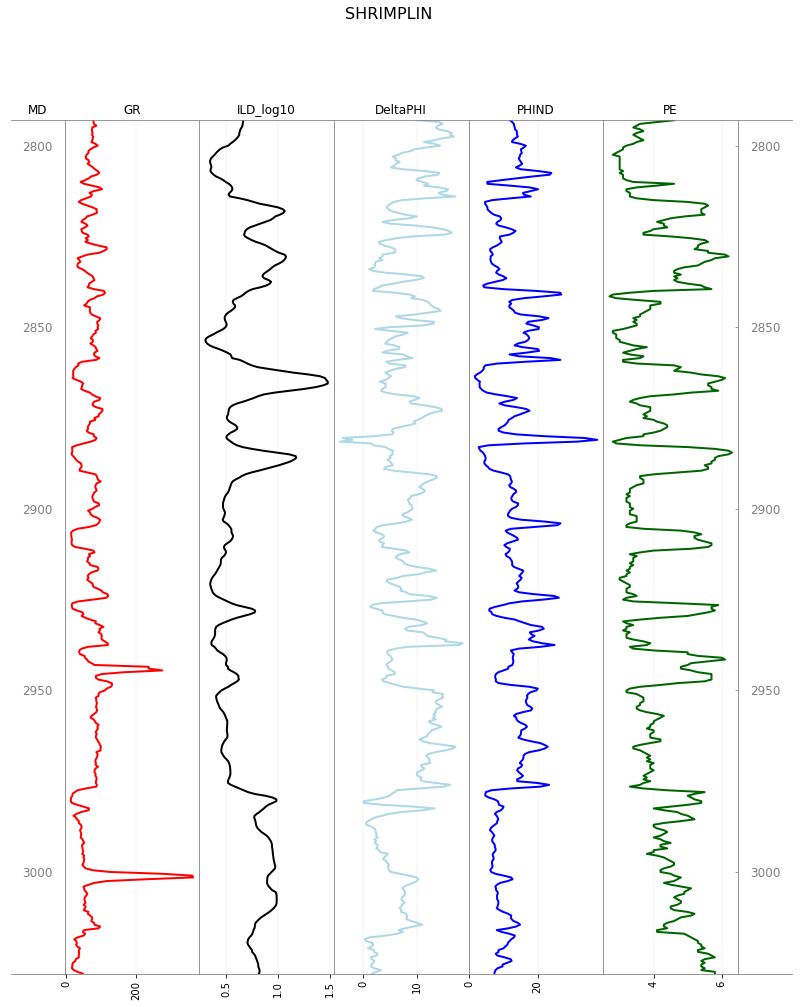

In [9]:
for name, data in training_data.groupby('Well Name'):   
    wl = welly.Well({}) 
    wl.header.uwi = name
    wl.header.name = name
    for i, log in enumerate(list(data)):
        if not log in ['Depth', 'Facies', 'Formation', 'Well Name', 'NM_M', 'RELPOS']:
            p = {'mnemonic': log}
            c = welly.Curve(data[log], basis=data['Depth'].values, params=p)
            wl.data[log]= c    
    f = wl.plot(tracks=tracks, extents='curves', legend = custom_curve_legend, return_fig = True) 
    f.set_size_inches(14, np.round(len(c))/30)